In [3]:
# HIDDEN
using CSV
using DataFrames
using MLJ
using Statistics
using StatsPlots
Base.displaysize() = (5, 100)

In [7]:
# HIDDEN
using Random
Random.seed!(42)

function jitter_df(df, x_col, y_col)
    x_jittered = df[:, x_col] .+ randn(length(df[:, x_col])) .* 0
    y_jittered = df[:, y_col] .+ randn(length(df[: ,y_col])) .* 0.05
    return DataFrame(x_col=x_jittered, y_col=y_jittered)
end;

## Regression on Probabilities

In basketball, players score by shooting a ball through a hoop. One such player, LeBron James, is widely considered one of the best basketball players ever for his incredible ability to score.

<img src="https://upload.wikimedia.org/wikipedia/commons/4/4e/LeBron_James_%2831944491583%29.jpg" alt="LeBron James (31944491583).jpg" height="480" width="308">

LeBron plays in the National Basketball Association (NBA), the United States's premier basketball league. We've collected a dataset of all of LeBron's attempts in the 2017 NBA Playoff Games using the NBA statistics website (https://stats.nba.com/). 

In [4]:
lebron = CSV.read("lebron.csv")

,game_date,minute,opponent,action_type,shot_type,shot_distance,shot_made
,Int64,Int64,String,String,String,Int64,Int64
1,20170415,10,IND,Driving Layup Shot,2PT Field Goal,0,0
2,20170415,11,IND,Driving Layup Shot,2PT Field Goal,0,1
3,20170415,14,IND,Layup Shot,2PT Field Goal,0,1
4,20170415,15,IND,Driving Layup Shot,2PT Field Goal,0,1
5,20170415,18,IND,Alley Oop Dunk Shot,2PT Field Goal,0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮


Each row of this dataset contains the following attributes of a shot LeBron attempted:

- `game_date`: The date of the game.
- `minute`: The minute that the shot was attempted (each NBA game is 48 minutes long).
- `opponent`: The team abbreviation of LeBron's opponent.
- `action_type`: The type of action leading up to the shot.
- `shot_type'`: The type of shot (either a 2 point shot or 3 point shot).
- `shot_distance`: LeBron's distance from the basket when the shot was attempted (ft).
- `shot_made`: `0` if the shot missed, `1` if the shot went in.

We would like to use this dataset to predict whether LeBron will make future shots. This is a *classification problem*; we predict a category, not a continuous number as we do in regression.

We may reframe this classification problem as a type of regression problem by predicting the *probability* that a shot will go in. For example, we expect that the probability that LeBron makes a shot is lower when he is farther away from the basket.

We plot the shot attempts below, showing the distance from the basket on the x-axis and whether he made the shot on the y-axis. Jittering the points slightly on the y-axis mitigates overplotting.

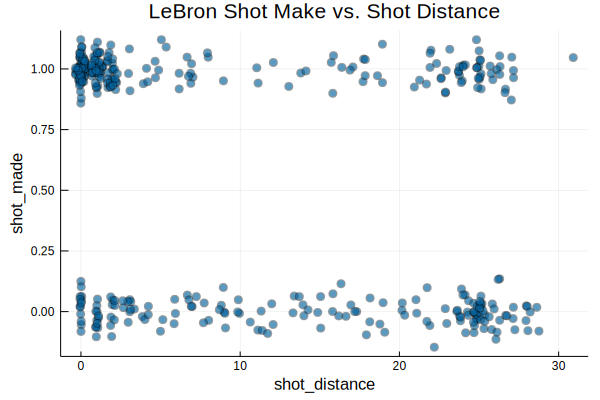

In [20]:
# HIDDEN
lebron_jittered = jitter_df(lebron, :shot_distance, :shot_made)
@df lebron_jittered dotplot(:x_col, :y_col, markeralpha=0.4, legend=false)
title!("LeBron Shot Make vs. Shot Distance")
xlabel!("shot_distance")
ylabel!("shot_made")

We can see that LeBron tends to make most shots when he is within five feet of the basket. A simple least squares linear regression model fit on this data produces the following predictions:

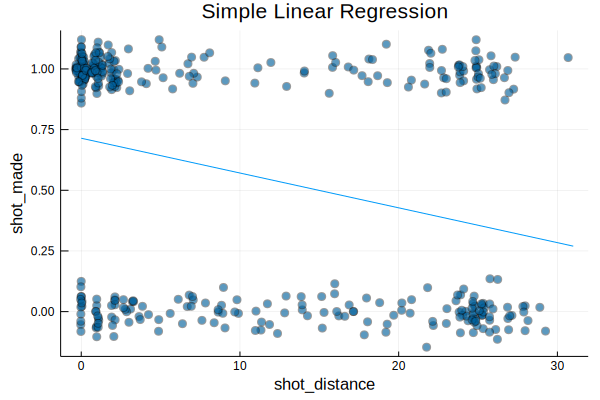

In [23]:
# HIDDEN
@df lebron_jittered dotplot(:x_col, :y_col, markeralpha=0.4, legend=false, regression=true)
title!("Simple Linear Regression")
xlabel!("shot_distance")
ylabel!("shot_made")

Linear regression predicts a continuous value. To perform classification, however, we need to convert this value into a category: a shot make or miss. We can accomplish this by setting a cutoff, or **classification threshold**. If the regression predicts a value greater than 0.5, we predict that the shot will make. Otherwise, we predict that the shot will miss.

We draw the cutoff below as a green dashed line. According to this cutoff, our model predicts that LeBron will make a shot if he is within 15 feet of the basket.

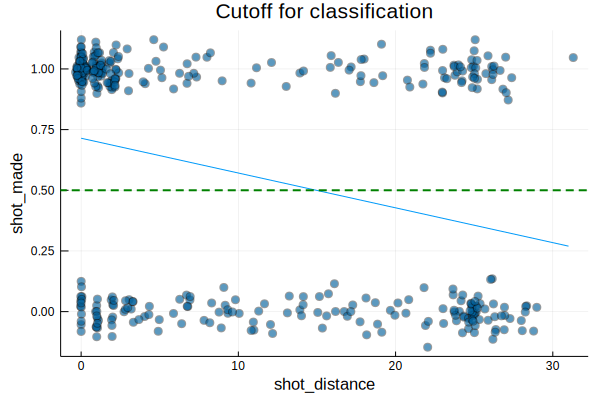

In [22]:
# HIDDEN
@df lebron_jittered dotplot(:x_col, :y_col, markeralpha=0.4, legend=false, regression=true)
title!("Cutoff for classification")
xlabel!("shot_distance")
ylabel!("shot_made")
plot!([0.5], seriestype=:hline, linestyle=:dash, linecolor=:green, linewidth=2)